## Challenges in the dataset

## 1.what are the top three category that has more number of apps
## 2.What is the rating of apps of the category which has more number of apps
## 3.Is the apps are free or paid. If so what is their percentage
## 4.what is the percentage of paid apps in respective categories
## 5.what is the average rating of all apps and how it look like in plot
## 6.what is the  app with the highest price and apps with the price greater than 300 dollars
## 7.what is the content rating of most apps
## 8.what is the rating of the apps in the top two category that has more number of apps
## 9.which category has morethan 10Million installs with more than 4.7 rating
## 10.what are the apps with 100million downloads
## 11.what are the apps with morethan 60 million reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
from plotly.offline import iplot
import plotly.tools as tls
import cufflinks as cf

In [2]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df['Rating'].mean()

4.193338315362448

In [5]:
df['Type'].fillna('Free',inplace=True)

In [6]:
df['Rating'].fillna('4.19',inplace=True)

In [7]:
df['Content Rating'].fillna('Everyone',inplace=True)

In [8]:
df.drop(['Android Ver','Current Ver'], axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


#### 1.what are the top three category that has more number of apps


In [9]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

## Conclusion for question 1:It is seen that the family category has the most number of apps followed by game and tools category

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['Reviews'] = df.Reviews.replace("0.0",0)
df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')

In [12]:
df['Rating']=pd.to_numeric(df['Rating'])
df['Rating'].dtype

dtype('float64')

In [13]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000") 
df['Size'] = df.Size.str.replace("k","")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] =df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

In [14]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df.Installs.replace("Free",np.nan)
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

dtype('float64')

In [15]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

dtype('float64')

In [16]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10358.000000,1.035800e+04,8832.000000,1.035700e+04,10357.000000
mean,4.189607,4.061551e+05,19320.056001,1.415776e+07,1.030800
std,0.505405,2.696768e+06,23997.244440,8.023955e+07,16.278625
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,5.500000,1.000000e+03,0.000000
50%,4.200000,1.683000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,4.648275e+04,29000.000000,1.000000e+06,0.000000
max,19.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [17]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
df['Rating'].unique()

array([ 4.1 ,  3.9 ,  4.7 ,  4.5 ,  4.3 ,  4.4 ,  3.8 ,  4.2 ,  4.6 ,
        3.2 ,  4.  ,  4.19,  4.8 ,  4.9 ,  3.6 ,  3.7 ,  3.3 ,  3.4 ,
        3.5 ,  3.1 ,  5.  ,  2.6 ,  3.  ,  1.9 ,  2.5 ,  2.8 ,  2.7 ,
        1.  ,  2.9 ,  2.3 ,  2.2 ,  1.7 ,  2.  ,  1.8 ,  2.4 ,  1.6 ,
        2.1 ,  1.4 ,  1.5 ,  1.2 , 19.  ])

In [19]:
py.offline.init_notebook_mode(connected=True)

In [20]:
cf.go_offline()

## count of the apps of respective category

In [21]:
#count of apps of respective category
count=df["Category"].value_counts()
count.iplot(kind="bar")

## 2.What is the rating of apps of the category which has more number of apps


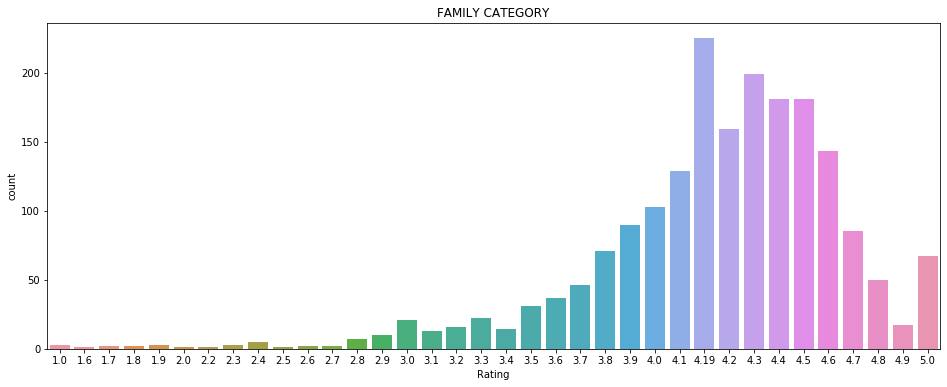

In [22]:
plt.figure(figsize=(16,6))
plt.title('FAMILY CATEGORY')
sb.countplot(x=df[df.Category=="FAMILY"].Rating)

## Conclusion of question2:Here is the rating of the apps of the category Family which show that the most number of apps has the rating of 4.19 followed by 4.3 and 4.5

## 3.Is the apps are free or paid. If so what is their percentage

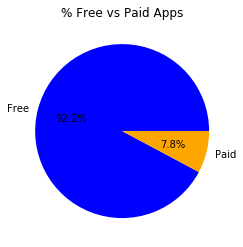

In [23]:
size=[8895,753]
typ = ['Free', 'Paid']
colors = ['blue', 'orange']
plt.pie(size,labels=typ, colors=colors, autopct='%.1f%%')
plt.title('% Free vs Paid Apps')
plt.show()

## Conclusion of question 3:The apps are both paid and free with the percentage of 7.8% of paid apps and 92.2% of free apps 

## 4.what is the percentage of paid apps in respective categories


In [24]:

paided = df[df['Type'] == 'Paid']

Text(0.5, 1.0, '% Distribution of Paided Apps Categories')

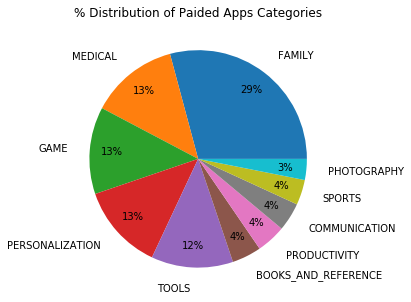

In [25]:
df1 = paided['Category'].value_counts()
df1 = df1.reset_index()
df1 = df1[:10]
plt.figure(figsize=(10,5))
plt.pie(x = list(df1['Category']), labels=list(df1['index']), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.2)
plt.title('% Distribution of Paided Apps Categories')

## Conclusion of Question4: Here is the percentage of paid apps in the respective categoryies. Family category has more number of paid apps with 29% followed by medical,game.personalization with 13%(for three of them) and tools with 12%

## 5.what is the average rating of all apps and how it look like in plot


4.19


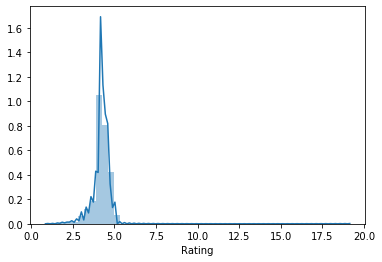

In [26]:
rating=df['Rating'].mean()
print(round(rating,2))
sb.distplot(df.Rating)

## Conclusion of question5:The average rating of all apps is 4.19

## 6.what is the  app with the highest price and apps with the price greater than 300 dollars


In [27]:
df[["Installs","App","Category"]][df.Price > 300]


,Installs,App,Category
4197,100.0,most expensive app (H),FAMILY
4362,10000.0,💎 I'm rich,LIFESTYLE
4367,10000.0,I'm Rich - Trump Edition,LIFESTYLE
5351,100000.0,I am rich,LIFESTYLE
5354,10000.0,I am Rich Plus,FAMILY
5356,50000.0,I Am Rich Premium,FINANCE
5357,1000.0,I am extremely Rich,LIFESTYLE
5358,1000.0,I am Rich!,FINANCE
5359,5000.0,I am rich(premium),FINANCE
5362,5000.0,I Am Rich Pro,FAMILY


## Conclusion of question6:Here is the apps and its installs with price more than 300 dollars. And this apps belongs to family, lifestyle,finance category

## 7.what is the content rating of most apps


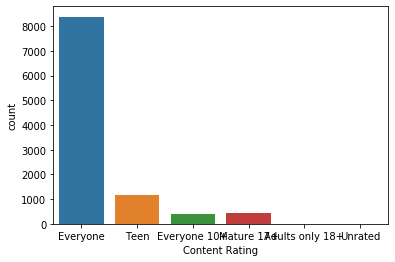

In [28]:
sb.countplot(data=df, x='Content Rating')

## Conclusion of question7:Here it shows clearly most number of apps can be used by everyone that can be teen, mature, 18+, and others.

## 8.what is the rating of the apps in the top two category that has more number of apps


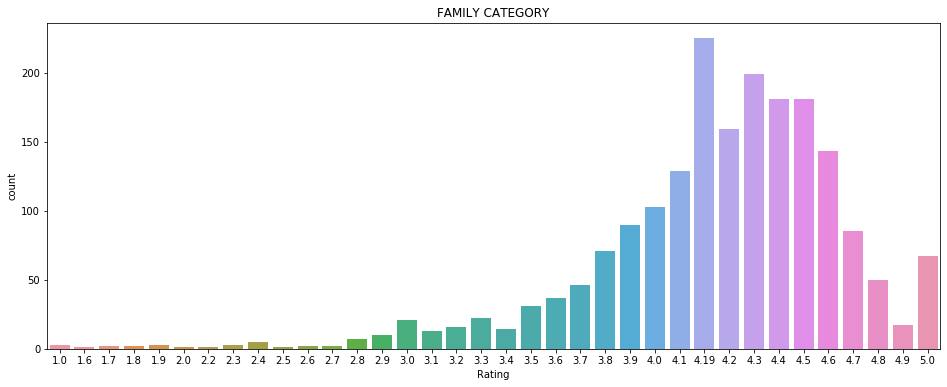

In [29]:
plt.figure(figsize=(16,6))
plt.title('FAMILY CATEGORY')
sb.countplot(x=df[df.Category=="FAMILY"].Rating)

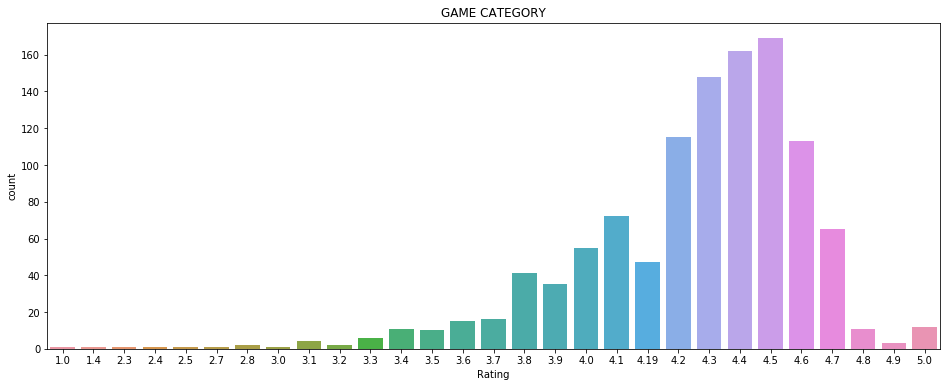

In [30]:
plt.figure(figsize=(16,6))
plt.title('GAME CATEGORY')
sb.countplot(x=df[df.Category=="GAME"].Rating)

## Conclusion of question8:The family category which has most number of apps has the rating of 4.19 to its most number of apps and the game category has 4.5 rating to its most number of apps.

In [31]:
#plot on the category and its rating
df.iplot(x='Category',y='Rating',kind='bar')

## 9.which category has morethan 10Million installs with more than 4.7 rating


In [32]:

df[(df['Rating'] > 4.7)&(df['Installs']>=10000000) ]['App']

1256                          Home Workout - No Equipment
1260                    Six Pack in 30 Days - Abs Workout
1261                               Lose Weight in 30 Days
1267           30 Day Fitness Challenge - Workout at Home
1360    Period Tracker - Period Calendar Ovulation Tra...
1361    Period Tracker Clue: Period and Ovulation Tracker
1714                                           Wordscapes
1765                                           Wordscapes
1820    Cash, Inc. Money Clicker Game & Business Adven...
1889                                           Wordscapes
2040         No. Color - Color by Number, Number Coloring
2571                         Amino: Communities and Chats
3671                              Video Player All Format
4038    DU Recorder – Screen Recorder, Video Editor, Live
4073                                             Eternium
4799                          PewDiePie's Tuber Simulator
4854                    Six Pack in 30 Days - Abs Workout
4862       Abs

## Conclusion of question9:There are 28 apps with more than 10 million installs with rating greater than 4.7

## 10.what are the apps with 100million downloads


In [33]:
df.App[df['Installs']>100000000].unique()

array(['Google Play Books', 'Messenger – Text and Video Chat for Free',
       'WhatsApp Messenger', 'Google Chrome: Fast & Secure', 'Gmail',
       'Hangouts', 'Viber Messenger', 'imo free video calls and chat',
       'Google Duo - High Quality Video Calls',
       'UC Browser - Fast Download Private & Secure',
       'Skype - free IM & video calls', 'LINE: Free Calls & Messages',
       'Google Play Games', 'Subway Surfers', 'Candy Crush Saga',
       'Temple Run 2', 'Pou', 'My Talking Tom', 'Facebook', 'Instagram',
       'Facebook Lite', 'Snapchat', 'Google+', 'Google Photos',
       'Maps - Navigate & Explore', 'Google Street View', 'Google',
       'Google Translate', 'SHAREit - Transfer & Share',
       'Gboard - the Google Keyboard', 'Microsoft Word', 'Google Drive',
       'Dropbox', 'Google Calendar', 'Cloud Print', 'YouTube',
       'Google Play Movies & TV', 'MX Player', 'Google News', 'Twitter',
       'Flipboard: News For Our Time',
       'Clean Master- Space Cleaner & 

## Conclusion of question 10: There are 44 number of apps which are more than 100 million installs

## 11.what are the apps with morethan 60 million reviews


In [34]:
df.App[df['Reviews']>60000000].unique()

array(['WhatsApp Messenger', 'Facebook', 'Instagram'], dtype=object)

## Conslusion of question11:There is 3 apps with more than 60 million reviews.